<a href="https://colab.research.google.com/github/mesimoa/MESIMO-BAN6420/blob/main/Copy_of_Mesimo_Milestone_Assignment_2_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Milestone Assignment 2: Principal Component Analysis**#

As a Data analyst at the Anderson Cancer Center, you are tasked with developing a model to address the growing number of referrals at the center. This model's first step is to identify essential variables for securing donor funding. After consulting with your team, Principal Component Analysis (PCA) has been chosen as the most suitable technique for this task.


Assignment Description
In this assignment, you will perform the following tasks:


1) PCA Implementation
Utilize PCA to demonstrate how essential variables can be acquired from the cancer dataset available from sklearn.datasets.


2) Dimensionality Reduction
Reduce the dataset into 2 PCA components for the project.


3) Bonus Point (Optional)
Implement logistic regression for prediction.

NOTE:
Submit your work as a zipped file or provide a link to your Github repository, including a README file with instructions.

Assignment Instructions
To successfully complete this assignment, follow these steps:

1)Implement PCA using the cancer dataset from sklearn.datasets.

2)Reduce the dataset into 2 PCA components.

3)Optionally, implement logistic regression for prediction to earn bonus points.

4)Submit your work as a zipped file or a link to your GitHub repository. Include a README file with comprehensive instructions.

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

Load and process the Dataset

In [2]:
# upload the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
target_names = data.target_names

In [3]:
#Display the head of the DataFrame

df = pd.DataFrame(X, columns=data.feature_names)

df['target'] = y
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [4]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Performing Prinicipal Component Analysis

In [5]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [6]:
# Created a DataFrame with PCA components
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y
df_pca['target'] = df_pca['target'].map({0: target_names[0], 1: target_names[1]})

Plotting Prinicipal Component Analysis

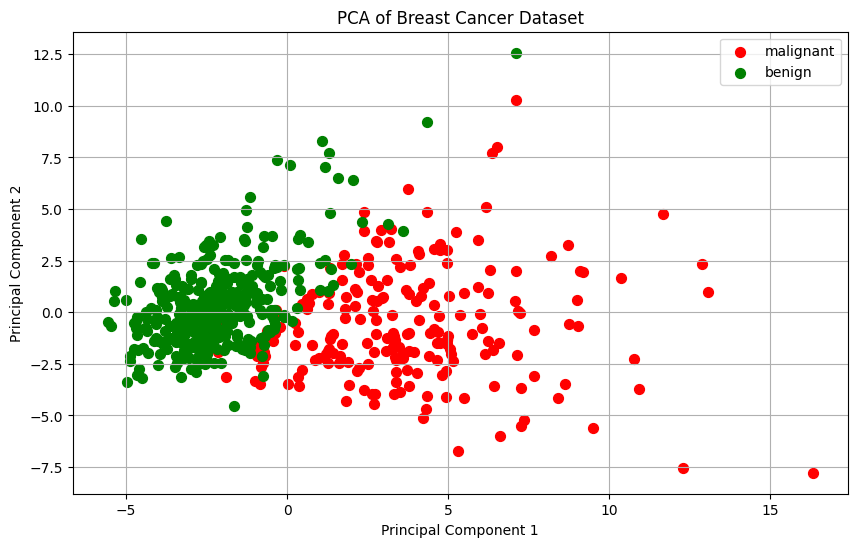

PCA performed and plotted successfully.


In [7]:
# Plot PCA components
plt.figure(figsize=(10, 6))
targets = target_names
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = df_pca['target'] == target
    plt.scatter(df_pca.loc[indicesToKeep, 'PC1'],
                df_pca.loc[indicesToKeep, 'PC2'],
                c=color, s=50, label=target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of Breast Cancer Dataset')
plt.grid()
plt.show()

print("PCA performed and plotted successfully.")

Malignant: are cancerous tumors and can spread cancer cells throughout the body through blood or lympathic system.

Benign: They are tumors that stay in their primary location without invading other sites of the body.

The scatter plot displays the data points from the PCA-derived principle components (PC1 and PC2) for the breast cancer dataset.

Every data point is a sample of a tumor.
The green and red color are used for the class labels: benign (green) and malignant (red)
The way the two classes are divided in the plot can be understood as follows:
a) Given that the classes in the plot are clearly divided, it may be concluded that the primary components effectively distinguish between benign and malignant tumors.
b) But since some of the groups are not well defined, it means that the primary components might not be able to accurately differentiate between benign and malignant tumors using the information provided.

This could indicate that more characteristics are required for a more effective separation or that the dataset is not easily separable.

The variance of the data along such dimensions is indicated by the direction and distribution of the data points along the major components. Plot points that are wider apart can indicate higher variance along those main components.

In [8]:
# Interpretation of reduction
explained_variance_ratio = pca.explained_variance_ratio_
print("\nInterpretation of Reduction:")
print("Explained Variance Ratio (PC1, PC2):", explained_variance_ratio)



Interpretation of Reduction:
Explained Variance Ratio (PC1, PC2): [0.44272026 0.18971182]


PC1 and PC2 capture 63.4% of the total variance indicating a meaningful reduction in dimensionaliity. PC1 explains 44.27% of the total variance, capturing the largest amount of information from the original features while PC2 explains 18.97% of the total variance, capturing additional variability not explained by PC1.

The plot of PC1 and PC2 shows a difference between malignant and benign tumors, indicating that these principal components capture important patterns in the data, however, with lateral overlap at the meet point.

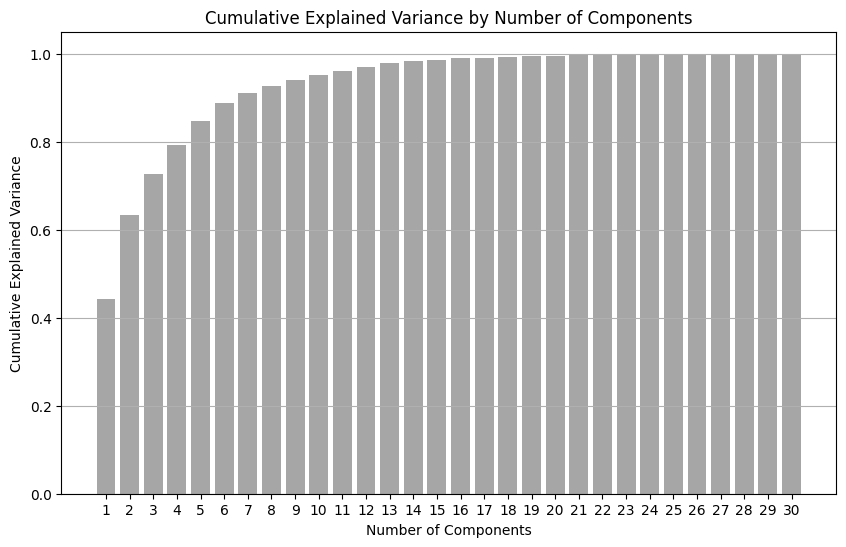

In [9]:
# Cumulative explained variance
pca_full = PCA().fit(X_scaled)
cumulative_explained_variance = np.cumsum(pca_full.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, alpha=0.7, color='grey')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.grid(axis='y')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.show()

Explanation:
This visualization provides an understanding on how much variance is explained by each additional principal component.


Insight:

The plot shows how many principal components are required to explain a certain percentage of the variance.

# **Using PCA Components for Logistic Regression**

-Hyperparameter Tuing and Confusion Matrix**

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Implement Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("\nLogistic Regression Results:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)



Logistic Regression Results:
Accuracy: 0.9912280701754386
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



Accuracy: using the model correctly approximately 99.12% of the breast cancer samples were classified.
Precision:

Class 0 (benign): All samples predicted as benign are actually benign (100% precision).
Class 1 (malignant): Approximately 99% of samples predicted as malignant are actually malignant.

Recall (or Sensitivity):
Class 0 (benign): The model correctly identified approximately 98% of the actual benign samples.
Class 1 (malignant): The model correctly identified all malignant samples (100% recall).

F1-score:
Class 0 (benign): The F1-score, which balances precision and recall, is approximately 99%.
Class 1 (malignant): The F1-score is also approximately 99%.

Support:
Class 0 (benign): There are 43 actual benign samples.
Class 1 (malignant): There are 71 actual malignant samples.

Macro avg and weighted avg:
Macro avg: The unweighted mean of precision, recall, and F1-score across all classes.
Weighted avg: The weighted mean of precision, recall, and F1-score across all classes, with support as the weight.

In summary, the logistic regression model shows excellent performance in classifying breast cancer samples, with high accuracy, precision, recall, and F1-score for both classes.

In [11]:
#Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Perform grid search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Train logistic regression with best parameters
logistic_model_best = LogisticRegression(**best_params)
logistic_model_best.fit(X_train, y_train)

# Evaluate the tuned model
y_pred_best = logistic_model_best.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)

print("\nTuned Logistic Regression Results:")
print("Accuracy:", accuracy_best)
print("Classification Report:\n", classification_rep_best)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Best Cross-Validation Score: 0.9406593406593406

Tuned Logistic Regression Results:
Accuracy: 0.9912280701754386
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

